# 清洗数据
检测与处理缺失值

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df

,A,B,C,D
2013-01-01,0,NaN,2.0,3
2013-01-02,4,5.0,NaN,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [4]:
df1=df.fillna(value=0)
df1

,A,B,C,D
2013-01-01,0,0.0,2.0,3
2013-01-02,4,5.0,0.0,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [5]:
# 平均值替换

In [8]:
df['B']=df['B'].fillna(df['B'].mean())
df['C']=df['C'].fillna(df['C'].mean())
df

,A,B,C,D
2013-01-01,0,13.0,2.0,3
2013-01-02,4,5.0,13.2,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


# 使用回归法插补

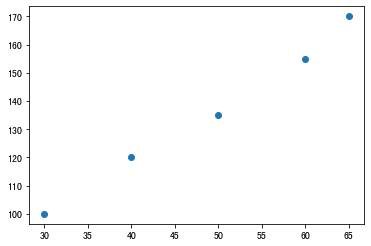

In [18]:
import scipy.interpolate as si
x = [30, 40, 50, 60, 65]
y = [100, 120, 135, 155, 170]
plt.scatter(x, y)
plt.show()

In [23]:
linear=si.interp1d(x,y,kind='linear')
print(linear(45))

127.5


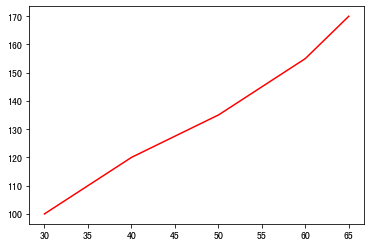

In [26]:
xs=np.linspace(min(x),max(x),200)
ys=linear(xs)
plt.plot(xs,ys,color='r')
plt.show()

## 例子二

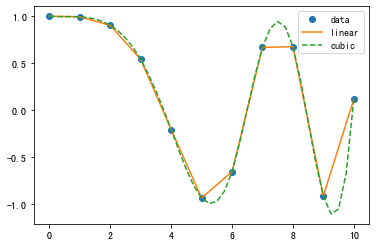

In [30]:
import numpy as np
# interpolation 插值
from scipy.interpolate import interp1d  # 注意是1,2,3,的1 不是l,m,n,的l
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=11, endpoint=True)  # 0-10之间 11个点
y = np.cos(-x ** 2 / 9.0)  # 函数
 
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')  
# 'zero', 'slinear', 'quadratic', 'cubic' 分别是：阶梯插值 线性插值 二阶曲线插值 三阶曲线插值
 
xnew = np.linspace(0, 10, num=41, endpoint=True)  # 0-10之间 41个点 最后一个点存在

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')  # o表示圆点 -表示实线 --表示虚线
plt.legend(['data', 'linear', 'cubic'], loc='best')  # 图释
plt.show() 